In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
import datetime as dt
import plotly.io as pio
import plotly.graph_objects as go
import calendar
pd.set_option('display.max_columns', None)

In [2]:
df1= pd.read_csv('Unemployment in India.csv')
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df2=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df2

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [4]:
df2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [5]:
df2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [6]:
df1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [8]:
df=pd.concat([df1, df2], ignore_index=True)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,NaN,NaN,NaN
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,NaN,NaN,NaN
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,NaN,NaN,NaN
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1030,West Bengal,30-06-2020,M,7.29,30726310.0,40.39,NaN,East,22.9868,87.855
1031,West Bengal,31-07-2020,M,6.83,35372506.0,46.17,NaN,East,22.9868,87.855
1032,West Bengal,31-08-2020,M,14.87,33298644.0,47.48,NaN,East,22.9868,87.855
1033,West Bengal,30-09-2020,M,9.35,35707239.0,47.73,NaN,East,22.9868,87.855


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    1007 non-null   object 
 1    Date                                     1007 non-null   object 
 2    Frequency                                1007 non-null   object 
 3    Estimated Unemployment Rate (%)          1007 non-null   float64
 4    Estimated Employed                       1007 non-null   float64
 5    Estimated Labour Participation Rate (%)  1007 non-null   float64
 6   Area                                      740 non-null    object 
 7   Region.1                                  267 non-null    object 
 8   longitude                                 267 non-null    float64
 9   latitude                                  267 non-null    float64
dtypes: float64(5), object(5)
memory usag

In [10]:
df.describe(include="all")

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
count,1007,1007,1007,1007.000000,1.007000e+03,1007.000000,740,267,267.000000,267.000000
unique,28,18,3,NaN,NaN,NaN,2,5,NaN,NaN
top,Andhra Pradesh,29-02-2020,Monthly,NaN,NaN,NaN,Urban,North,NaN,NaN
freq,38,79,381,NaN,NaN,NaN,381,79,NaN,NaN
mean,NaN,NaN,NaN,11.906991,8.996209e+06,42.378620,NaN,NaN,22.826048,80.532425
std,NaN,NaN,NaN,10.739549,1.020784e+07,8.048542,NaN,NaN,6.270731,5.831738
min,NaN,NaN,NaN,0.000000,4.942000e+04,13.330000,NaN,NaN,10.850500,71.192400
25%,NaN,NaN,NaN,4.685000,1.639125e+06,37.835000,NaN,NaN,18.112400,76.085600
50%,NaN,NaN,NaN,8.890000,5.543380e+06,40.880000,NaN,NaN,23.610200,79.019300
75%,NaN,NaN,NaN,16.125000,1.287115e+07,45.315000,NaN,NaN,27.278400,85.279900


In [11]:
df_g=df.groupby('Region')['Area'].apply(lambda x: x.mode().iloc[0]).reset_index()
df_g.columns = ['Region', 'Mode_Area']
df_g

,Region,Mode_Area
0,Andhra Pradesh,Rural
1,Assam,Urban
2,Bihar,Rural
3,Chandigarh,Urban
4,Chhattisgarh,Rural
5,Delhi,Rural
6,Goa,Rural
7,Gujarat,Rural
8,Haryana,Rural
9,Himachal Pradesh,Rural


In [12]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,28
1,Date,28
2,Frequency,28
3,Estimated Unemployment Rate (%),28
4,Estimated Employed,28
5,Estimated Labour Participation Rate (%),28
6,Area,295
7,Region.1,768
8,longitude,768
9,latitude,768


In [13]:
df.loc[df['Region'].isna()]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Here, we can see that all the 28 records are null for each respective feature/attribute. So, it is better to drop these record!!!.

In [14]:
df.dropna(how='all', inplace=True)

In [15]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate (%),0
4,Estimated Employed,0
5,Estimated Labour Participation Rate (%),0
6,Area,267
7,Region.1,740
8,longitude,740
9,latitude,740


In [16]:
df_c=df.loc[df['Area'].isna(), 'Region'].reset_index()
df_c

,index,Region
0,768,Andhra Pradesh
1,769,Andhra Pradesh
2,770,Andhra Pradesh
3,771,Andhra Pradesh
4,772,Andhra Pradesh
...,...,...
262,1030,West Bengal
263,1031,West Bengal
264,1032,West Bengal
265,1033,West Bengal


In [17]:
df_c['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [18]:
df_c['Region'].value_counts().reset_index()

,Region,count
0,Andhra Pradesh,10
1,Assam,10
2,Uttarakhand,10
3,Uttar Pradesh,10
4,Tripura,10
5,Telangana,10
6,Tamil Nadu,10
7,Rajasthan,10
8,Punjab,10
9,Puducherry,10


In [19]:
def fill_area_mode(group):
    mode_value = group['Area'].mode().iloc[0]
    group['Area'].fillna(mode_value, inplace=True)
    return group
df['Area']=df.groupby('Region')['Area'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [20]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate (%),0
4,Estimated Employed,0
5,Estimated Labour Participation Rate (%),0
6,Area,0
7,Region.1,740
8,longitude,740
9,latitude,740


In [21]:
df['Region.1'].value_counts().reset_index()

,Region.1,count
0,North,79
1,South,60
2,West,50
3,East,40
4,Northeast,38


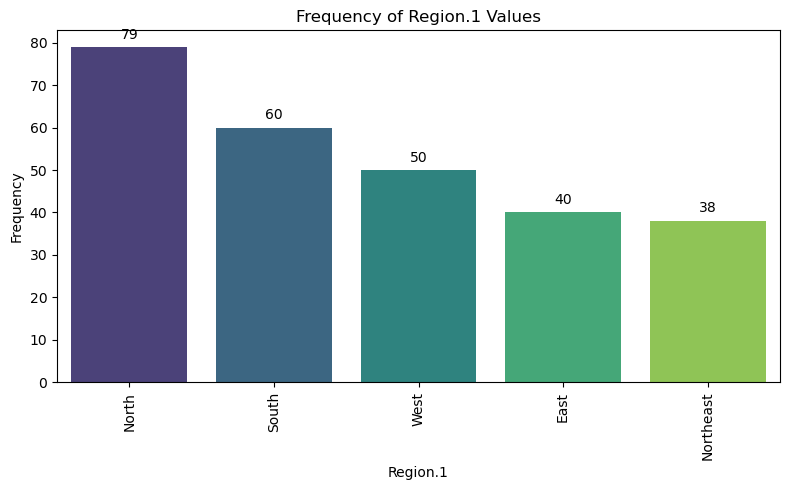

In [22]:
value_counts_df = df['Region.1'].value_counts().reset_index()
plt.figure(figsize = (8,5))
ax = sns.barplot(x='Region.1', y='count', data=value_counts_df, palette='viridis')
plt.xlabel('Region.1')
plt.ylabel('Frequency')
plt.title('Frequency of Region.1 Values')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()

plt.show()

In [23]:
df.groupby('Region')['Region.1'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

,Region,Region.1
0,Andhra Pradesh,South
1,Assam,Northeast
2,Bihar,East
3,Chandigarh,None
4,Chhattisgarh,West
5,Delhi,North
6,Goa,West
7,Gujarat,West
8,Haryana,North
9,Himachal Pradesh,North


In [24]:
def fill_area_mode(group):
    mode_value = group['Region.1'].mode().iloc[0]
    group['Region.1'].fillna(mode_value, inplace=True)
    return group
df['Region.1'] = df.groupby('Region')['Region.1'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [25]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate (%),0
4,Estimated Employed,0
5,Estimated Labour Participation Rate (%),0
6,Area,0
7,Region.1,12
8,longitude,740
9,latitude,740


In [26]:
df[df['Region.1'].isna()]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
415,Chandigarh,31-05-2019,Monthly,18.35,348042.0,44.89,Urban,NaN,NaN,NaN
416,Chandigarh,30-06-2019,Monthly,12.40,337145.0,40.44,Urban,NaN,NaN,NaN
417,Chandigarh,31-07-2019,Monthly,21.80,294379.0,39.47,Urban,NaN,NaN,NaN
418,Chandigarh,31-08-2019,Monthly,9.52,328282.0,37.95,Urban,NaN,NaN,NaN
419,Chandigarh,30-09-2019,Monthly,20.14,327239.0,42.77,Urban,NaN,NaN,NaN
420,Chandigarh,31-10-2019,Monthly,13.99,330856.0,40.06,Urban,NaN,NaN,NaN
421,Chandigarh,30-11-2019,Monthly,22.05,289593.0,38.60,Urban,NaN,NaN,NaN
422,Chandigarh,31-12-2019,Monthly,8.33,311146.0,35.19,Urban,NaN,NaN,NaN
423,Chandigarh,31-01-2020,Monthly,20.00,332062.0,42.94,Urban,NaN,NaN,NaN
424,Chandigarh,29-02-2020,Monthly,16.67,316887.0,39.25,Urban,NaN,NaN,NaN


In [27]:
df.fillna(value={'Region.1': "Northwest"}, inplace=True)

In [28]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate (%),0
4,Estimated Employed,0
5,Estimated Labour Participation Rate (%),0
6,Area,0
7,Region.1,0
8,longitude,740
9,latitude,740


In [29]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [30]:
df.groupby('Region')['longitude'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

,Region,longitude
0,Andhra Pradesh,15.9129
1,Assam,26.2006
2,Bihar,25.0961
3,Chandigarh,NaN
4,Chhattisgarh,21.2787
5,Delhi,28.7041
6,Goa,15.2993
7,Gujarat,22.2587
8,Haryana,29.0588
9,Himachal Pradesh,31.1048


In [31]:
def fill_area_mode(group):
    mode_value = group['longitude'].mode().iloc[0]
    group['longitude'].fillna(mode_value, inplace=True)
    return group
df['longitude'] = df.groupby('Region')['longitude'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [32]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate (%),0
4,Estimated Employed,0
5,Estimated Labour Participation Rate (%),0
6,Area,0
7,Region.1,0
8,longitude,12
9,latitude,740


In [33]:
df[df['longitude'].isna()]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
415,Chandigarh,31-05-2019,Monthly,18.35,348042.0,44.89,Urban,Northwest,NaN,NaN
416,Chandigarh,30-06-2019,Monthly,12.40,337145.0,40.44,Urban,Northwest,NaN,NaN
417,Chandigarh,31-07-2019,Monthly,21.80,294379.0,39.47,Urban,Northwest,NaN,NaN
418,Chandigarh,31-08-2019,Monthly,9.52,328282.0,37.95,Urban,Northwest,NaN,NaN
419,Chandigarh,30-09-2019,Monthly,20.14,327239.0,42.77,Urban,Northwest,NaN,NaN
420,Chandigarh,31-10-2019,Monthly,13.99,330856.0,40.06,Urban,Northwest,NaN,NaN
421,Chandigarh,30-11-2019,Monthly,22.05,289593.0,38.60,Urban,Northwest,NaN,NaN
422,Chandigarh,31-12-2019,Monthly,8.33,311146.0,35.19,Urban,Northwest,NaN,NaN
423,Chandigarh,31-01-2020,Monthly,20.00,332062.0,42.94,Urban,Northwest,NaN,NaN
424,Chandigarh,29-02-2020,Monthly,16.67,316887.0,39.25,Urban,Northwest,NaN,NaN


In [34]:
df.fillna(value={'longitude': 30.7333}, inplace=True)

In [35]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate (%),0
4,Estimated Employed,0
5,Estimated Labour Participation Rate (%),0
6,Area,0
7,Region.1,0
8,longitude,0
9,latitude,740


In [36]:
df.groupby('Region')['latitude'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

,Region,latitude
0,Andhra Pradesh,79.7400
1,Assam,92.9376
2,Bihar,85.3131
3,Chandigarh,NaN
4,Chhattisgarh,81.8661
5,Delhi,77.1025
6,Goa,74.1240
7,Gujarat,71.1924
8,Haryana,76.0856
9,Himachal Pradesh,77.1734


In [37]:
def fill_area_mode(group):
    mode_value = group['latitude'].mode().iloc[0]
    group['latitude'].fillna(mode_value, inplace=True)
    return group
df['latitude'] = df.groupby('Region')['latitude'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [38]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate (%),0
4,Estimated Employed,0
5,Estimated Labour Participation Rate (%),0
6,Area,0
7,Region.1,0
8,longitude,0
9,latitude,12


In [39]:
df.fillna(value={'latitude': 76.7794}, inplace=True)

In [40]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate (%),0
4,Estimated Employed,0
5,Estimated Labour Participation Rate (%),0
6,Area,0
7,Region.1,0
8,longitude,0
9,latitude,0


In [41]:
df.sample(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
901,Madhya Pradesh,31-05-2020,M,21.98,18443927.0,38.48,Rural,West,22.9734,78.6569
250,Punjab,31-12-2019,Monthly,6.13,6164215.0,43.40,Rural,North,31.1471,75.3412
864,Jammu & Kashmir,31-08-2020,M,11.09,3429950.0,36.66,Rural,North,33.7782,76.5762
924,Meghalaya,31-08-2020,M,3.74,1357643.0,59.88,Rural,Northeast,25.4670,91.3662
54,Delhi,31-05-2019,Monthly,12.56,169487.0,42.33,Rural,North,28.7041,77.1025
533,Karnataka,31-05-2019,Monthly,6.56,8638239.0,40.62,Urban,South,15.3173,75.7139
858,Jammu & Kashmir,31-01-2020,M,21.08,3453025.0,42.20,Rural,North,33.7782,76.5762
799,Chhattisgarh,29-02-2020,M,8.38,9195114.0,45.58,Rural,West,21.2787,81.8661
59,Delhi,31-10-2019,Monthly,15.84,149511.0,37.90,Rural,North,28.7041,77.1025
666,Sikkim,31-03-2020,Monthly,20.45,86186.0,50.57,Urban,Northeast,27.5330,88.5122


In [42]:
df.shape

(1007, 10)

In [43]:
df_gm=df.groupby('Region')['Area'].apply(lambda x: x.mode().iloc[0]).reset_index()

df_gm.columns = ['Region', 'Mode_Area']
df_gm

,Region,Mode_Area
0,Andhra Pradesh,Rural
1,Assam,Urban
2,Bihar,Rural
3,Chandigarh,Urban
4,Chhattisgarh,Rural
5,Delhi,Rural
6,Goa,Rural
7,Gujarat,Rural
8,Haryana,Rural
9,Himachal Pradesh,Rural


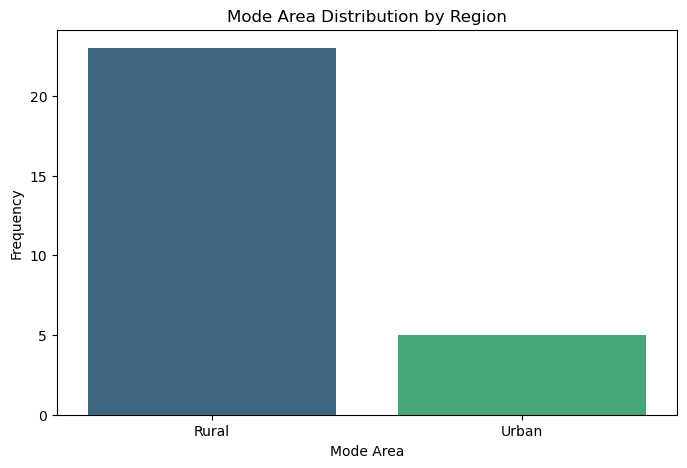

In [44]:
plt.figure(figsize=(8, 5))  # Adjust the figure size if needed
sns.countplot(data=df_gm, x='Mode_Area', palette='viridis')
plt.xlabel('Mode Area')
plt.ylabel('Frequency')
plt.title('Mode Area Distribution by Region')

# Show the plot
plt.show()

In [46]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Region.1', 'longitude', 'latitude'],
      dtype='object')

##### Here, as the column names contain whitespaces, we will remove the whitespaces so that it won't be hectic for us in the further par!!.

In [47]:
df.rename(columns = {' Date':'Date',
                        ' Frequency': 'Frequency',
                        ' Estimated Unemployment Rate (%)': 'Estimated Unemployment Rate',
                        ' Estimated Employed': 'Estimated Employed',
                        ' Estimated Labour Participation Rate (%)': 'Estimated Labour Participation Rate',
                        'longitude': 'latitude',
                        'latitude': 'longitude',
                        'Region.1': 'Part'}, inplace = True)

In [48]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Area',
       'Part', 'latitude', 'longitude'],
      dtype='object')

In [49]:
df['Date'].unique()

array([' 31-05-2019', ' 30-06-2019', ' 31-07-2019', ' 31-08-2019',
       ' 30-09-2019', ' 31-10-2019', ' 30-11-2019', ' 31-12-2019',
       ' 31-01-2020', ' 29-02-2020', ' 31-03-2020', ' 30-04-2020',
       ' 31-05-2020', ' 30-06-2020', ' 31-07-2020', ' 31-08-2020',
       ' 30-09-2020', ' 31-10-2020'], dtype=object)

##### Now this is a problem, cause there is a whitespace before every value, which would definitely throw us an error while converting this feature to datetime. So, here we'll remove the whitespaces.

In [50]:
df['Date']=df['Date'].str.replace(' ','')
df['Date'].unique()

array(['31-05-2019', '30-06-2019', '31-07-2019', '31-08-2019',
       '30-09-2019', '31-10-2019', '30-11-2019', '31-12-2019',
       '31-01-2020', '29-02-2020', '31-03-2020', '30-04-2020',
       '31-05-2020', '30-06-2020', '31-07-2020', '31-08-2020',
       '30-09-2020', '31-10-2020'], dtype=object)

In [51]:
df['Frequency'].unique()

array([' Monthly', 'Monthly', ' M'], dtype=object)

In [52]:
df['Frequency']=df['Frequency'].str.replace(' Monthly', 'Monthly')
df['Frequency']=df['Frequency'].str.replace(' M', 'Monthly')

In [53]:
df['Frequency'].unique()

array(['Monthly'], dtype=object)

In [54]:
df.to_csv('Unemployment_combined.csv', index=False)

##### Now, We are done with the data-cleaning process.

In [55]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [56]:
df['Month'] = df['Date'].dt.month.apply(lambda x: calendar.month_name[x])

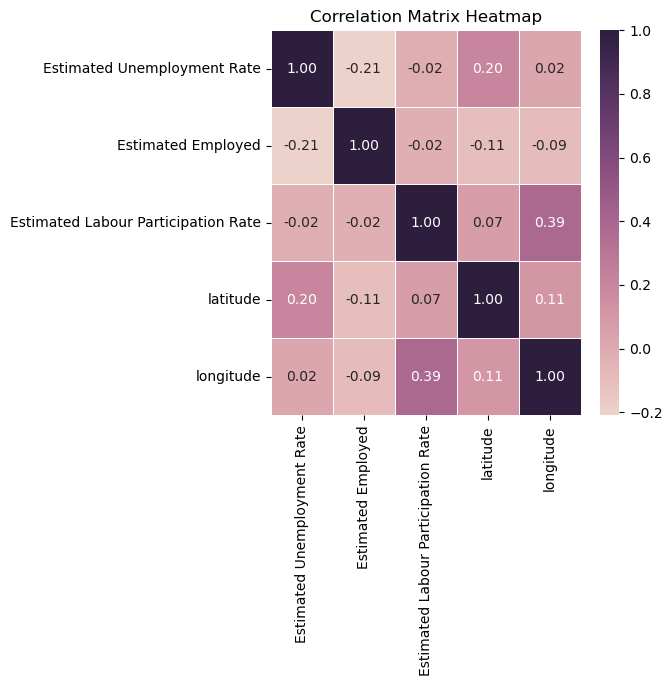

In [57]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_columns.corr()

plt.figure(figsize=(5, 5))

sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [58]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,Part,latitude,longitude,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,South,15.9129,79.74,2019,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,South,15.9129,79.74,2019,June
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,South,15.9129,79.74,2019,July
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,South,15.9129,79.74,2019,August
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,South,15.9129,79.74,2019,September


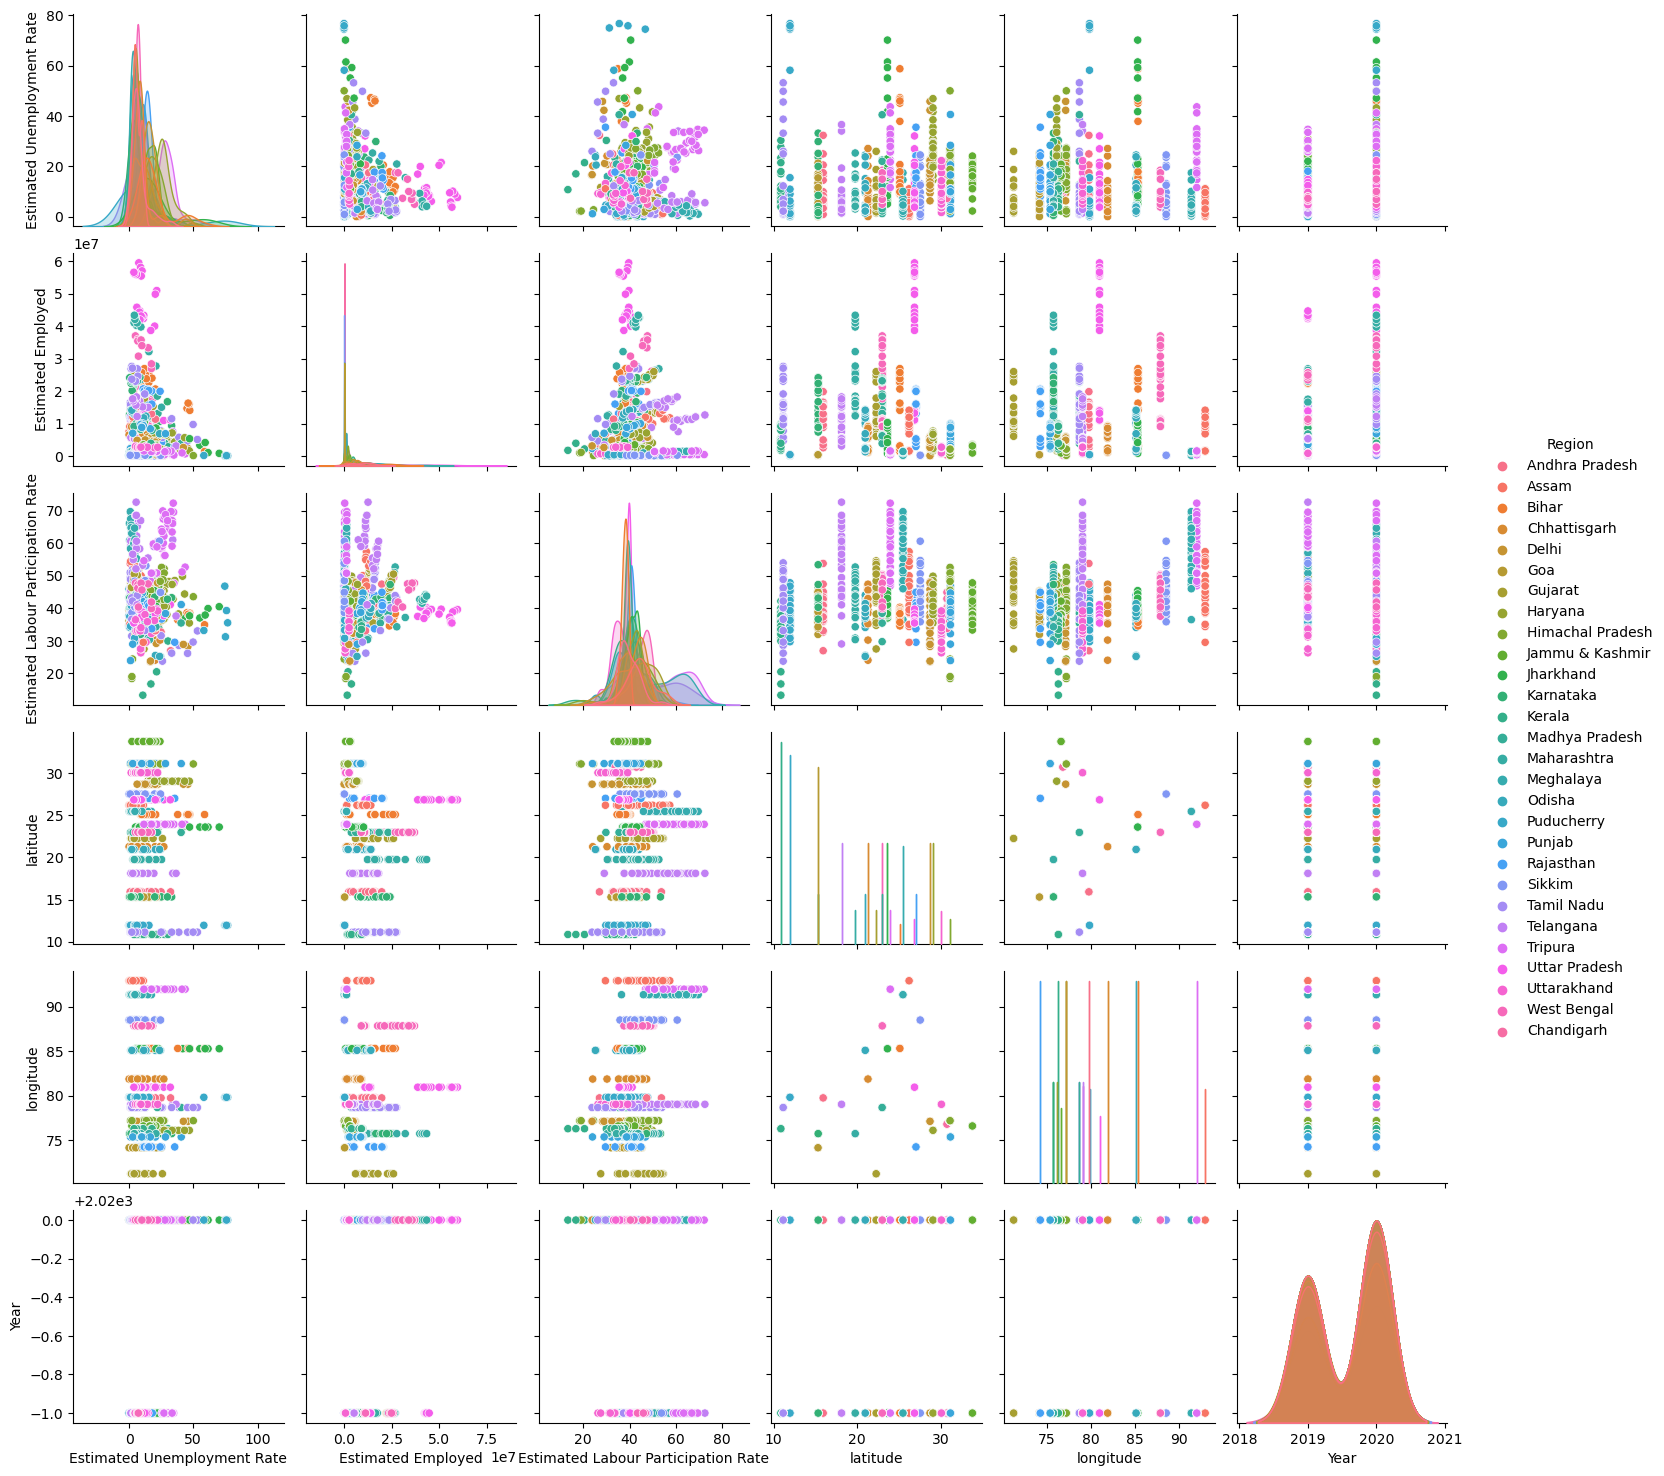

In [59]:
sns.pairplot(df,hue='Region')

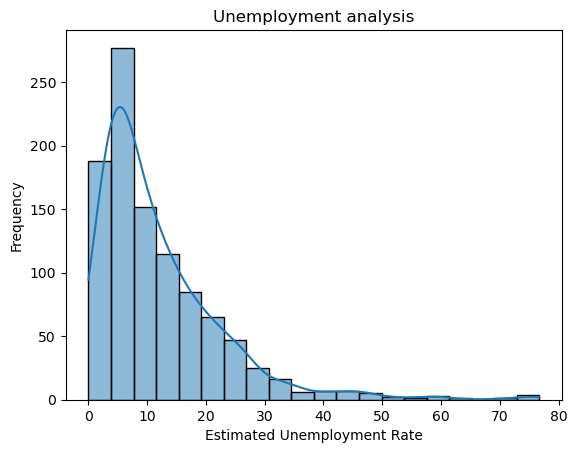

In [60]:
sns.histplot(df['Estimated Unemployment Rate'], bins=20, kde=True)
plt.xlabel('Estimated Unemployment Rate')
plt.ylabel('Frequency')
plt.title('Unemployment analysis')
plt.show()

In [61]:
df_2019 = df[df['Year'] == 2019]
month_order = [calendar.month_name[i] for i in range(1, 13)]
df_2019['Month'] = pd.Categorical(df_2019['Month'], categories=month_order, ordered=True)


df_2019_monthly_avg = df_2019.groupby('Month')['Estimated Unemployment Rate'].mean().reset_index()

fig_2019 = px.line(df_2019_monthly_avg, x='Month', y='Estimated Unemployment Rate', title='Unemployment Rate Trend (2019)',
                   labels={'Estimated Unemployment Rate': 'Unemployment Rate (%)'},
                   line_dash_sequence=['solid'], color_discrete_sequence=['blue'])
trace_2019 = go.Scatter(x=df_2019_monthly_avg['Month'], y=df_2019_monthly_avg['Estimated Unemployment Rate'], 
                        mode='markers+lines', name='2019', line=dict(color='blue'))

fig_2019.add_trace(trace_2019)
fig_2019.update_layout(
    xaxis_title='Month',
    yaxis_title='Unemployment Rate (%)',
    template='plotly_white'
)

fig_2019.show()

In [63]:
df_2019 = df[df['Year'] == 2019]
df_2020 = df[df['Year'] == 2020]

avg_labpart_2019 = df_2019.groupby('Region')['Estimated Labour Participation Rate'].mean().reset_index()
avg_labpart_2020 = df_2020.groupby('Region')['Estimated Labour Participation Rate'].mean().reset_index()

combined_df = pd.merge(avg_labpart_2019, avg_labpart_2020, on='Region', suffixes=('_2019', '_2020'))

fig = px.bar(combined_df, x='Region', y=['Estimated Labour Participation Rate_2019', 'Estimated Labour Participation Rate_2020'],
             barmode='group', labels={'value': 'Participation Rate (%)'},title='Average Estimated Labour Paricipation Rate by Region (2019 vs. 2020)')

fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Participation Rate (%)',
    template='plotly_white'
)

fig.show()


In [65]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df_2019 = df[df['Year'] == 2019]
df_2020 = df[df['Year'] == 2020]

avg_unemployment_2019 = df_2019.groupby(['Month', 'Area'])['Estimated Unemployment Rate'].mean().reset_index()
avg_unemployment_2020 = df_2020.groupby(['Month', 'Area'])['Estimated Unemployment Rate'].mean().reset_index()

avg_unemployment_2019['Year'] = 2019
avg_unemployment_2020['Year'] = 2020
combined_df = pd.concat([avg_unemployment_2019, avg_unemployment_2020], ignore_index=True)

fig = px.bar(combined_df, x='Month', y='Estimated Unemployment Rate', color='Area', facet_col='Year',
             labels={'Estimated Unemployment Rate': 'Unemployment Rate (%)'},
             title='Unemployment Rate Comparison (2019 vs. 2020) by Area',
             color_discrete_map={'Rural': 'blue', 'Urban': 'red'})

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Unemployment Rate (%)',
    template='plotly_white'
)
fig.show()

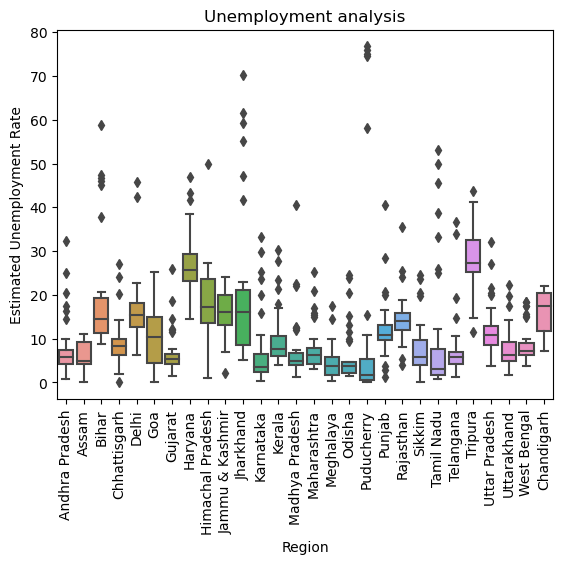

In [67]:
sns.boxplot(x='Region', y='Estimated Unemployment Rate', data=df)
plt.xticks(rotation=90)
plt.title('Unemployment analysis')
plt.show()

In [68]:
df_2019 = df[df['Year'] == 2019]
df_2020 = df[df['Year'] == 2020]

avg_unemployment_2019 = df_2019.groupby('Region')['Estimated Labour Participation Rate'].mean().reset_index()
avg_unemployment_2020 = df_2020.groupby('Region')['Estimated Labour Participation Rate'].mean().reset_index()

comparison_df = avg_unemployment_2019.merge(avg_unemployment_2020, on='Region', suffixes=('_2019', '_2020'))

comparison_df = comparison_df.rename(columns={'Estimated Labour Participation Rate_2019': 'Avg Labour Participation Rate 2019',
                                              'Estimated Labour Participation Rate_2020': 'Avg Labour Participation Rate 2020'})
comparison_df

,Region,Avg Labour Participation Rate 2019,Avg Labour Participation Rate 2020
0,Andhra Pradesh,40.095000,38.664545
1,Assam,46.140667,43.307143
2,Bihar,38.625000,37.365455
3,Chandigarh,39.921250,38.167500
4,Chhattisgarh,44.908750,40.535000
5,Delhi,41.438750,35.708182
6,Goa,39.686250,38.857222
7,Gujarat,47.681875,44.673636
8,Haryana,43.208125,42.105000
9,Himachal Pradesh,46.945625,40.436818


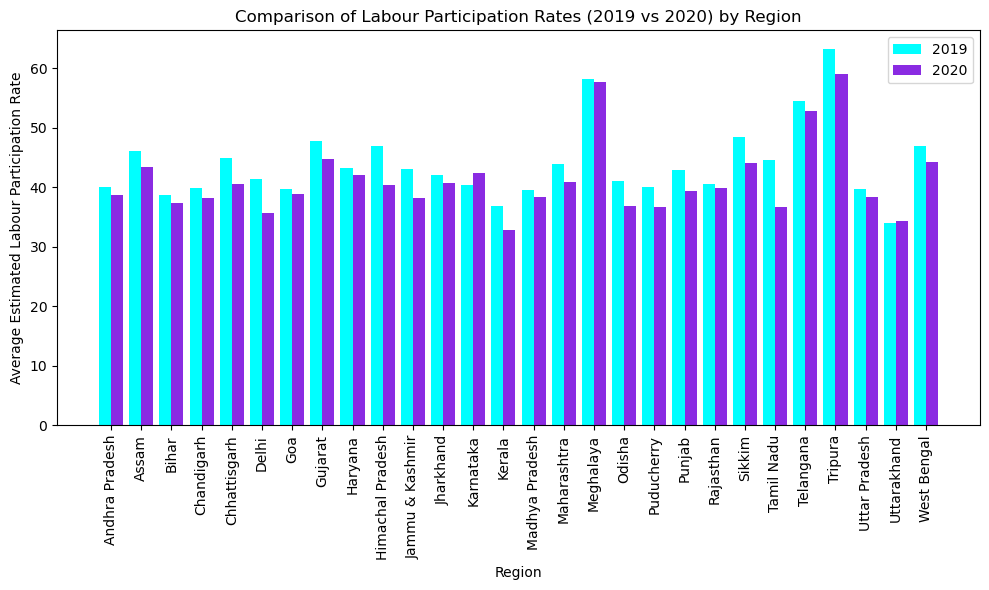

In [69]:
x = np.arange(len(comparison_df['Region']))
width = 0.4
plt.figure(figsize=(10, 6))

plt.bar(x - width/2, comparison_df['Avg Labour Participation Rate 2019'], width, label='2019', color='cyan')
plt.bar(x + width/2, comparison_df['Avg Labour Participation Rate 2020'], width, label='2020', color='blueviolet')

plt.xlabel('Region')
plt.ylabel('Average Estimated Labour Participation Rate')
plt.title('Comparison of Labour Participation Rates (2019 vs 2020) by Region')
plt.xticks(x, comparison_df['Region'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
df_2019 = df[df['Year'] == 2019]
df_2020 = df[df['Year'] == 2020]

avg_unemployment_2019 = df_2019.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()
avg_unemployment_2020 = df_2020.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()

comparison_df = avg_unemployment_2019.merge(avg_unemployment_2020, on='Region', suffixes=('_2019', '_2020'))

comparison_df = comparison_df.rename(columns={'Estimated Unemployment Rate_2019': 'Avg Unemployment Rate 2019',
                                              'Estimated Unemployment Rate_2020': 'Avg Unemployment Rate 2020'})
comparison_df

,Region,Avg Unemployment Rate 2019,Avg Unemployment Rate 2020
0,Andhra Pradesh,4.826875,9.944091
1,Assam,6.420667,5.684762
2,Bihar,13.882500,22.831818
3,Chandigarh,15.822500,16.330000
4,Chhattisgarh,7.346875,9.971364
5,Delhi,13.750625,19.363636
6,Goa,9.346250,10.817222
7,Gujarat,4.979375,7.758182
8,Haryana,22.798750,29.360000
9,Himachal Pradesh,19.064375,17.034091


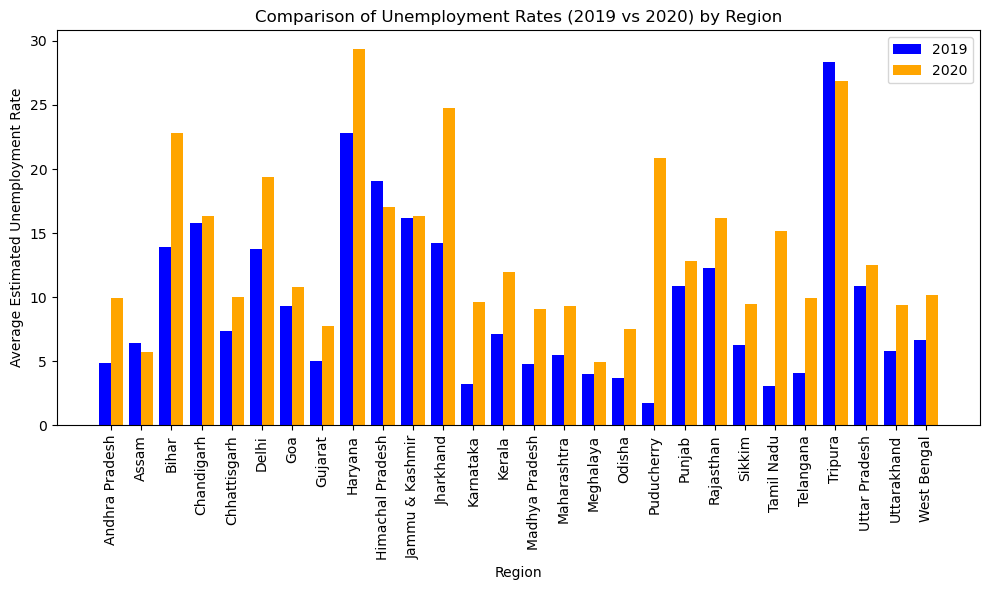

In [71]:
x = np.arange(len(comparison_df['Region']))
width = 0.4
plt.figure(figsize=(10, 6))

plt.bar(x - width/2, comparison_df['Avg Unemployment Rate 2019'], width, label='2019', color='blue')
plt.bar(x + width/2, comparison_df['Avg Unemployment Rate 2020'], width, label='2020', color='orange')

plt.xlabel('Region')
plt.ylabel('Average Estimated Unemployment Rate')
plt.title('Comparison of Unemployment Rates (2019 vs 2020) by Region')
plt.xticks(x, comparison_df['Region'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
average_unemployment_rate = df.groupby('Region')['Estimated Unemployment Rate'].mean()

In [73]:
state_with_highest_unemployment = average_unemployment_rate.idxmax()
highest_unemployment_rate = average_unemployment_rate.max()

In [74]:
print("State with the highest unemployment rate between 2019 and 2020 is:", state_with_highest_unemployment)
print("Highest unemployment rate of that state is:", highest_unemployment_rate)

State with the highest unemployment rate between 2019 and 2020 is: Tripura
Highest unemployment rate of that state is: 27.483157894736838


In [75]:
state_with_lowest_unemployment = average_unemployment_rate.idxmin()
lowest_unemployment_rate = average_unemployment_rate.min()

In [76]:
print("State with the lowest unemployment rate between 2019 and 2020 is:", state_with_lowest_unemployment)
print("Lowest unemployment rate of that state is:", lowest_unemployment_rate)

State with the lowest unemployment rate between 2019 and 2020 is: Meghalaya
Lowest unemployment rate of that state is: 4.546756756756756
